In [1]:
%pip install ipynb

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import ipynb

4316
4202
4316
0 466
, 352
x 343
5 73
t 71
e 69
  63
8 62
f 61
6 49
c 48
d 45
a 44
r 41
1 41
3 40
2 38
b 37
n 36
l 35
4 34
i 32
7 31
$ 22
s 19
9 18
; 17
p 16
u 16
I 15
o 15
( 15
) 15
m 13
P 12
[ 9
] 9
- 9
" 8
h 8
g 8
= 7
. 7
A 7
w 7
z 7
T 7
: 6
S 5
D 4
y 4

 3
k 3
C 3
L 3
{ 3
} 3
+ 3
' 2
V 2
F 2
W 2
B 2
v 1
N 1


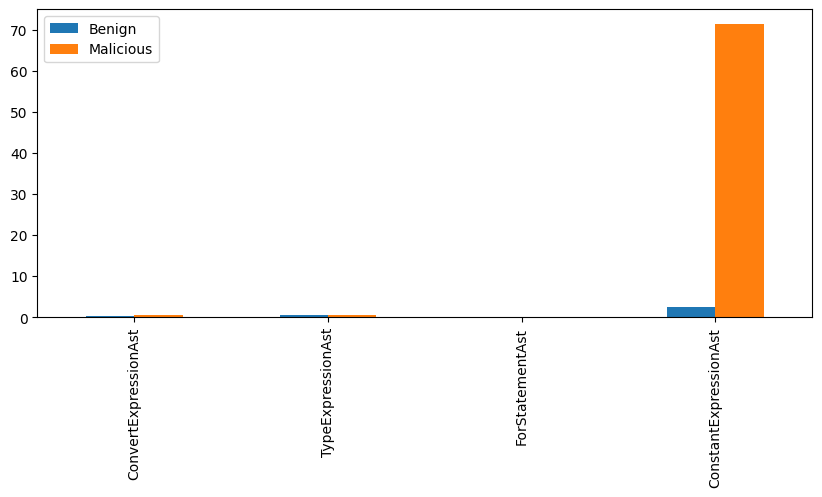

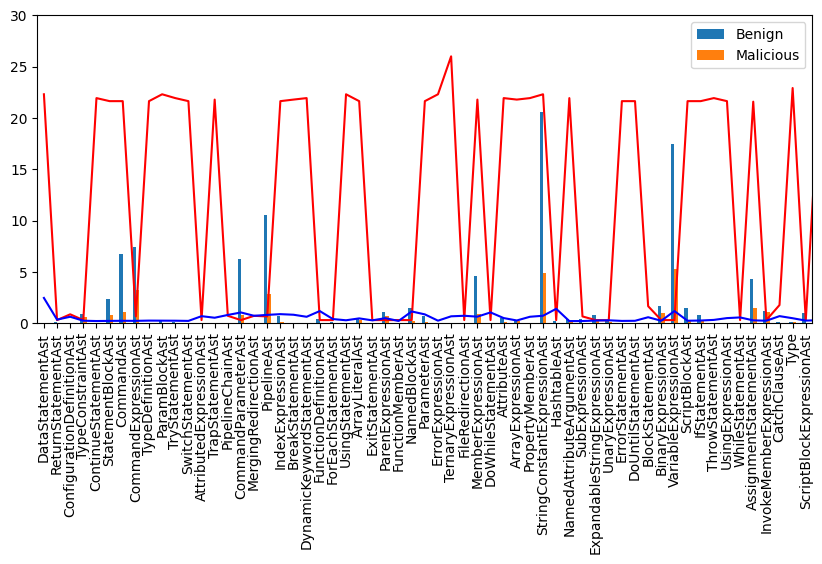

In [3]:
import ipynb.fs.full.shellcode as shellcode
import ipynb.fs.full.functional_level as functional_level
import ipynb.fs.full.entropy as entropy
import ipynb.fs.full.ast as ast
import ipynb.fs.full.strings as strings
import ipynb.fs.full.topfivechars as topfivechars
import ipynb.fs.full.url as url
import ipynb.fs.full.variable_names as variable_names

import utils

In [4]:
def get_token_filename(filename,type):
    return '../tokens/'+type+'/'+filename+'.csv'

def get_ast_filename(filename,type):   
    return '../ast/'+type+'/'+filename+'.csv'

get_ast_filename('1.ps1',"benign")

'../ast/benign/1.ps1.csv'

In [55]:
import os
malicious_filenames = os.listdir('../mpsd/malicious_pure/')
benign_filenames = os.listdir('../mpsd/powershell_benign_dataset/')
malicious_mixed_filenames = os.listdir('../mpsd/mixed_malicious/')


data = [["filename","shellcode","entropy","nstrings","max_len_string","avg_len_string","url","ast_score","tokens_score","type"]]

for file in malicious_filenames:
    row = []
    sc = 1 if shellcode.shell_code(get_token_filename(file,"malicious"))==True else 0
    file_entropy = entropy.entropy(os.path.join('../mpsd/malicious_pure/',file))
    nstrings,max_len_string,avg_len_string = strings.get_string_info(get_token_filename(file,"malicious"))
    urls = len(url.detect_urls(get_token_filename(file,"malicious")))
    ast_score = ast.file_score(get_ast_filename(file,"malicious"))
    tokens_score = functional_level.file_score(get_token_filename(file,"malicious"))
    row = [file,sc,file_entropy,nstrings,max_len_string,avg_len_string,urls,ast_score,tokens_score,1]
    data.append(row)

for file in malicious_mixed_filenames:
    row = []
    sc = 1 if shellcode.shell_code(get_token_filename(file,"mixed_malicious"))==True else 0
    file_entropy = entropy.entropy(os.path.join('../mpsd/mixed_malicious/',file))
    nstrings,max_len_string,avg_len_string = strings.get_string_info(get_token_filename(file,"mixed_malicious"))
    urls = len(url.detect_urls(get_token_filename(file,"mixed_malicious")))
    ast_score = ast.file_score(get_ast_filename(file,"mixed_malicious"))
    tokens_score = functional_level.file_score(get_token_filename(file,"mixed_malicious"))
    row = [file,sc,file_entropy,nstrings,max_len_string,avg_len_string,urls,ast_score,tokens_score,1]
    data.append(row)

for file in benign_filenames:
    row = []
    sc = 1 if shellcode.shell_code(get_token_filename(file,"benign"))==True else 0
    file_entropy = entropy.entropy(os.path.join('../mpsd/powershell_benign_dataset/',file))
    nstrings,max_len_string,avg_len_string = strings.get_string_info(get_token_filename(file,"benign"))
    urls = len(url.detect_urls(get_token_filename(file,"benign")))
    ast_score = ast.file_score(get_ast_filename(file,"benign"))
    tokens_score = functional_level.file_score(get_token_filename(file,"benign"))
    row = [file,sc,file_entropy,nstrings,max_len_string,avg_len_string,urls,ast_score,tokens_score,0]
    data.append(row)

data




[['filename',
  'shellcode',
  'entropy',
  'nstrings',
  'max_len_string',
  'avg_len_string',
  'url',
  'ast_score',
  'tokens_score',
  'type'],
 ['1.ps1',
  1,
  1.3632014990068968,
  2,
  430,
  217.5,
  0,
  22.318986685251623,
  0.2982047275771031,
  1],
 ['10.ps1',
  0,
  1.5863031643364294,
  3,
  37,
  28.333333333333332,
  1,
  0.32264128383942664,
  0.045945029579993045,
  1],
 ['100.ps1',
  0,
  1.4634303439510317,
  6,
  2245,
  392.5,
  0,
  0.8857430595867488,
  0.009142021513727111,
  1],
 ['1000.ps1',
  0,
  1.5911349642415493,
  3,
  38,
  27.333333333333332,
  1,
  0.32264128383942664,
  0.045945029579993045,
  1],
 ['1001.ps1',
  1,
  1.4033116952112492,
  2,
  430,
  217.5,
  0,
  21.946789665927014,
  0.2982047275771031,
  1],
 ['1002.ps1',
  1,
  1.398282565740305,
  2,
  430,
  217.5,
  0,
  21.650284990928416,
  0.2983152982863246,
  1],
 ['1003.ps1',
  1,
  1.389683670111165,
  2,
  430,
  217.5,
  0,
  21.650284990928416,
  0.2982047275771031,
  1],
 ['1004

In [56]:
import random
data = data[1:]
shuffled = random.shuffle(data)
features = []
outputs = []
print(data[0:10])
for row in data:
    features.append(row[1:len(row)-1])
    outputs.append(row[len(row)-1])



[['2630.ps1', 0, 1.420625494808559, 6, 50, 23.5, 0, 0.29143655992655254, 0.015251062522826226, 0], ['4299.ps1', 0, 1.4838548426491587, 75, 82, 24.666666666666668, 1, 0.27752012545534693, -1.2879381004083714, 0], ['1299_2742.ps1', 1, 1.5138156429044851, 37, 430, 22.43243243243243, 0, 10.290879643643484, 0.31215236242037625, 1], ['2724.ps1', 1, 1.4026999069450121, 2, 430, 217.5, 0, 21.946789665927014, 0.2983152982863246, 1], ['127.ps1', 0, 1.774863632383678, 58, 39947, 1407.5, 6, 0.49573893916607414, -0.07219464474186531, 0], ['878_3266.ps1', 0, 1.317761939023537, 43, 131, 48.18604651162791, 1, 0.5242588523139332, -0.12280532411957541, 1], ['2715.ps1', 1, 1.4048792216404893, 2, 430, 217.5, 0, 21.946789665927014, 0.2982047275771031, 1], ['2994.ps1', 0, 1.4721492123566935, 4, 15, 12.5, 0, 1.1461475466075925, 0.042423835732353095, 0], ['3592.ps1', 0, 1.7247208111758199, 116, 91, 8.10344827586207, 1, 0.516984281670557, 0.037693391225511005, 1], ['1798.ps1', 0, 1.4232385191943235, 105, 105, 2

In [57]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outputs, test_size = 0.30)
clf = RandomForestClassifier(n_estimators = 1000) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9245283018867925


In [58]:
import os
malicious_filenames = os.listdir('../mpsd/malicious_pure/')
benign_filenames = os.listdir('../mpsd/powershell_benign_dataset/')
malicious_mixed_filenames = os.listdir('../mpsd/mixed_malicious/')


data = [["filename","shellcode","entropy","nstrings","max_len_string","avg_len_string","url","ast_score","tokens_score","type"]]

for file in malicious_filenames:
    row = []
    sc = 1 if shellcode.shell_code(get_token_filename(file,"malicious"))==True else 0
    file_entropy = entropy.entropy(os.path.join('../mpsd/malicious_pure/',file))
    nstrings,max_len_string,avg_len_string = strings.get_string_info(get_token_filename(file,"malicious"))
    urls = len(url.detect_urls(get_token_filename(file,"malicious")))
    ast_score = ast.file_score(get_ast_filename(file,"malicious"))
    tokens_score = functional_level.file_score(get_token_filename(file,"malicious"))
    row = [file,sc,file_entropy,nstrings,max_len_string,avg_len_string,urls,ast_score,tokens_score,1]
    data.append(row)


for file in benign_filenames:
    row = []
    sc = 1 if shellcode.shell_code(get_token_filename(file,"benign"))==True else 0
    file_entropy = entropy.entropy(os.path.join('../mpsd/powershell_benign_dataset/',file))
    nstrings,max_len_string,avg_len_string = strings.get_string_info(get_token_filename(file,"benign"))
    urls = len(url.detect_urls(get_token_filename(file,"benign")))
    ast_score = ast.file_score(get_ast_filename(file,"benign"))
    tokens_score = functional_level.file_score(get_token_filename(file,"benign"))
    row = [file,sc,file_entropy,nstrings,max_len_string,avg_len_string,urls,ast_score,tokens_score,0]
    data.append(row)

In [59]:
import random
data = data[1:]
shuffled = random.shuffle(data)
features = []
outputs = []
print(data[0:10])
for row in data:
    features.append(row[1:len(row)-1])
    outputs.append(row[len(row)-1])

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outputs, test_size = 0.30)
clf = RandomForestClassifier(n_estimators = 1000) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

[['997.ps1', 0, 1.4615632325566408, 12, 67, 24.833333333333332, 0, 0.292722027489065, 0.0546192241263236, 0], ['506.ps1', 0, 1.5608272590521264, 8, 58, 24.375, 0, 0.2491554589214442, -0.034857134987330014, 0], ['3886.ps1', 1, 1.413978483361267, 2, 430, 217.5, 0, 21.946789665927014, 0.2983152982863246, 1], ['765.ps1', 0, 1.4375639452899478, 3, 31, 15.666666666666666, 1, 0.29991567517696405, 0.045945029579993045, 1], ['3262.ps1', 0, 1.2698944096200873, 1, 0, 0.0, 0, 0.6228045925975276, -0.005240347128370929, 0], ['3309.ps1', 0, 1.206836082401379, 13, 108, 19.846153846153847, 0, 0.6317799298357784, -0.12348695878117023, 0], ['3193.ps1', 0, 0.9318611684301756, 19, 76, 28.789473684210527, 0, 0.4422483926994368, 0.015703120946088642, 0], ['973.ps1', 0, 1.2931172395823367, 30, 41, 20.6, 0, 1.5107588427505705, -0.17708246963388516, 0], ['1807.ps1', 0, 1.7776749253097281, 5, 43, 23.8, 1, 0.6427328079849229, 0.006440277694468472, 1], ['3344.ps1', 1, 1.363592147522698, 2, 430, 217.5, 0, 22.318986